 <h1 style="text-align: center;"> Used Car Market Trends and Predictive Modeling</h1>

#### Data Cleaning & Preparation

In [18]:
#import libraries for data manipulation and visualisation
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Settings for better visuals
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10,6)
# Import necessary libraries for machine learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

In [20]:
df = pd.read_csv("car_prices.csv") # load CSV file into a DataFrame  
print("Dataset Shape:", df.shape) # print number of rows and columns 
df.head(5) # display first 5 rows of the dataset  

Dataset Shape: (558837, 16)


,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


In [21]:
# Check for missing values
print(df.isnull().sum())

year                0
make            10301
model           10399
trim            10651
body            13195
transmission    65352
vin                 4
state               0
condition       11820
odometer           94
color             749
interior          749
seller              0
mmr                38
sellingprice       12
saledate           12
dtype: int64


In [24]:
df = df.drop_duplicates() # remove duplicate rows  
df["saledate"] = df["saledate"].str.replace(r"\s*\(.*\)", "", regex=True) # clean timezone text 
df["saledate"] = pd.to_datetime(df["saledate"], errors="coerce", utc=True) # convert to datetime  
df.head() # preview first rows  

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,2014-12-16 20:30:00+00:00
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,2014-12-16 20:30:00+00:00
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,2015-01-15 12:30:00+00:00
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,2015-01-29 12:30:00+00:00
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,2014-12-18 20:30:00+00:00


In [26]:
df = df.dropna(subset=['saledate', 'year', 'odometer', 'make', 'mmr', 'state']) # drop missing values 
df = df[df["sellingprice"] > 0] # keep only valid selling prices  
df = df.drop('vin',axis=1) # drop VIN column(not necessary for analysis)

In [28]:
df['make']=df['make'].str.capitalize()# capitalize first letter of each car make  
df['make'].unique()# show unique car makes after cleaning  

array(['Kia', 'Bmw', 'Volvo', 'Nissan', 'Chevrolet', 'Audi', 'Ford',
       'Hyundai', 'Buick', 'Cadillac', 'Acura', 'Lexus', 'Infiniti',
       'Jeep', 'Mercedes-benz', 'Mitsubishi', 'Mazda', 'Mini',
       'Land rover', 'Lincoln', 'Jaguar', 'Volkswagen', 'Toyota',
       'Subaru', 'Scion', 'Porsche', 'Dodge', 'Fiat', 'Chrysler',
       'Ferrari', 'Honda', 'Gmc', 'Ram', 'Smart', 'Bentley', 'Pontiac',
       'Saturn', 'Maserati', 'Mercury', 'Hummer', 'Landrover', 'Mercedes',
       'Gmc truck', 'Saab', 'Suzuki', 'Oldsmobile', 'Isuzu', 'Dodge tk',
       'Geo', 'Rolls-royce', 'Mazda tk', 'Hyundai tk', 'Mercedes-b', 'Vw',
       'Daewoo', 'Chev truck', 'Ford tk', 'Plymouth', 'Ford truck',
       'Tesla', 'Airstream', 'Dot', 'Aston martin', 'Fisker',
       'Lamborghini', 'Lotus'], dtype=object)

In [30]:
df.head() # preview first rows  

,year,make,model,trim,body,transmission,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,2014-12-16 20:30:00+00:00
1,2015,Kia,Sorento,LX,SUV,automatic,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,2014-12-16 20:30:00+00:00
2,2014,Bmw,3 Series,328i SULEV,Sedan,automatic,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,2015-01-15 12:30:00+00:00
3,2015,Volvo,S60,T5,Sedan,automatic,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,2015-01-29 12:30:00+00:00
4,2014,Bmw,6 Series Gran Coupe,650i,Sedan,automatic,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,2014-12-18 20:30:00+00:00


In [32]:
# Dictionary mapping state/province abbreviations to full names 
state_map = {
    'ca': 'California',
    'tx': 'Texas',
    'pa': 'Pennsylvania',
    'mn': 'Minnesota',
    'az': 'Arizona',
    'wi': 'Wisconsin',
    'tn': 'Tennessee',
    'md': 'Maryland',
    'fl': 'Florida',
    'ne': 'Nebraska',
    'nj': 'New Jersey',
    'nv': 'Nevada',
    'oh': 'Ohio',
    'mi': 'Michigan',
    'ga': 'Georgia',
    'va': 'Virginia',
    'sc': 'South Carolina',
    'nc': 'North Carolina',
    'in': 'Indiana',
    'il': 'Illinois',
    'co': 'Colorado',
    'ut': 'Utah',
    'mo': 'Missouri',
    'ny': 'New York',
    'ma': 'Massachusetts',
    'pr': 'Puerto Rico',
    'or': 'Oregon',
    'la': 'Louisiana',
    'wa': 'Washington',
    'hi': 'Hawaii',
    # Canadian provinces/territories
    'qc': 'Quebec',
    'ab': 'Alberta',
    'on': 'Ontario',
    'ns': 'Nova Scotia',
    # Remaining US states
    'ok': 'Oklahoma',
    'ms': 'Mississippi',
    'nm': 'New Mexico',
    'al': 'Alabama'
}
df['state'] = df['state'].map(state_map).fillna(df['state'])# replace codes with full names
print(df['state'].unique())# check unique state/province names after mapping


['California' 'Texas' 'Pennsylvania' 'Minnesota' 'Arizona' 'Wisconsin'
 'Tennessee' 'Maryland' 'Florida' 'Nebraska' 'New Jersey' 'Nevada' 'Ohio'
 'Michigan' 'Georgia' 'Virginia' 'South Carolina' 'North Carolina'
 'Indiana' 'Illinois' 'Colorado' 'Utah' 'Missouri' 'New York'
 'Massachusetts' 'Puerto Rico' 'Oregon' 'Louisiana' 'Washington' 'Hawaii'
 'Quebec' 'Alberta' 'Ontario' 'Oklahoma' 'Mississippi' 'New Mexico'
 'Alabama' 'Nova Scotia']


#### The Relationship Between Car Age, Mileage, and Selling Price

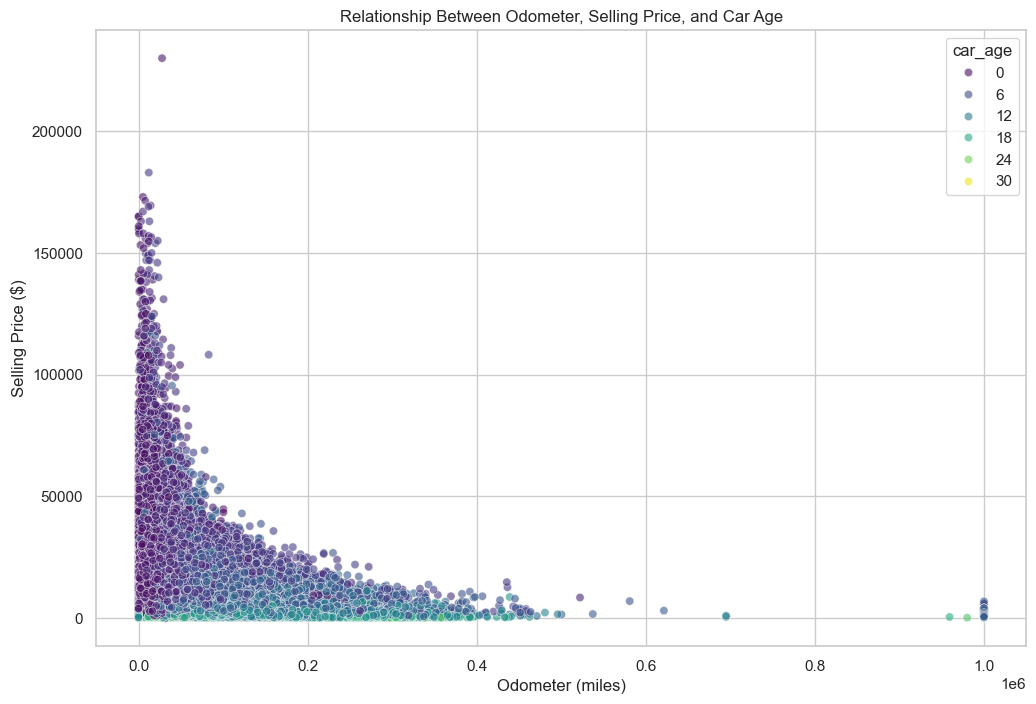

In [35]:
df['saledate_year'] = df['saledate'].dt.year # extract year from sale date  
df["car_age"] = df["saledate_year"] - df["year"] # calculate car age at sale  
plt.figure(figsize=(12, 8)) # set figure size  
sns.scatterplot(x="odometer", y="sellingprice", hue="car_age", data=df, palette="viridis", alpha=0.6) # color by car age
plt.title("Relationship Between Odometer, Selling Price, and Car Age") # plot title
plt.xlabel("Odometer (miles)")# x-axis label 
plt.ylabel("Selling Price ($)") # y-axis label  
plt.show() # display the plot


### Highest Average Selling Prices by Brand

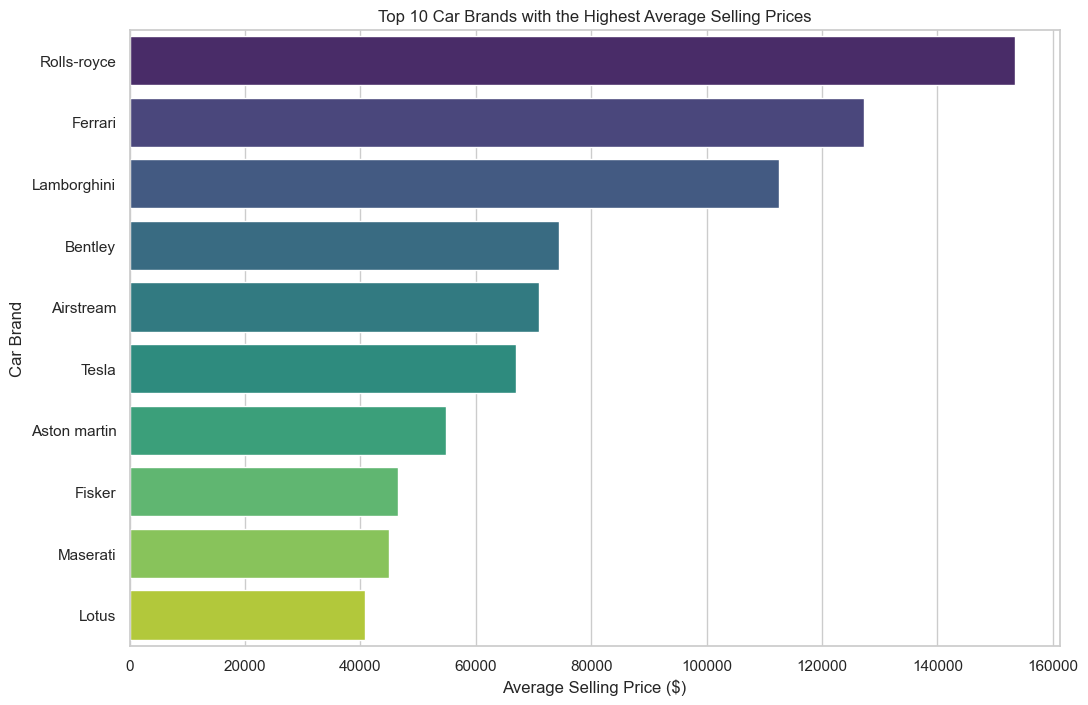

In [38]:
# Calculate the top 10 brands by average selling price
avg_price_by_make = (
    df.groupby("make")["sellingprice"].mean()# group by car brand and calculate mean price
        .sort_values(ascending=False)# sort brands from highest to lowest average price
            .head(10)# select the top 10
)
# Bar plot of the top 10 brands
plt.figure(figsize=(12, 8)) # set figure size
# Fix for the Seaborn FutureWarning
sns.barplot(x=avg_price_by_make.values, y=avg_price_by_make.index, hue=avg_price_by_make.index, palette="viridis", 
            legend=False)# 'legend=False' avoids repeating labels in a separate legend
plt.title("Top 10 Car Brands with the Highest Average Selling Prices")# plot title
plt.xlabel("Average Selling Price ($)")# x-axis label
plt.ylabel("Car Brand") # y-axis label  
plt.show()# display the plot

### Market Value (MMR) vs. Actual Selling Price

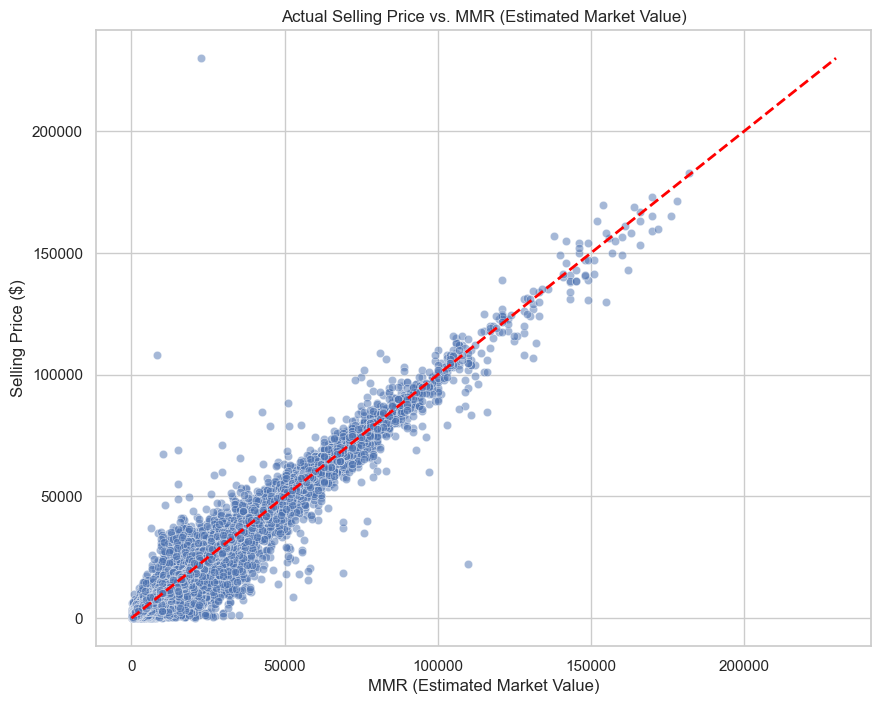

In [41]:
# Scatter plot of Selling Price vs. MMR
plt.figure(figsize=(10, 8))# set figure size
sns.scatterplot(x="mmr", y="sellingprice", data=df, alpha=0.5) # alpha=0.5 adds transparency
# Add a diagonal reference line y=x
min_val = min(df["mmr"].min(), df["sellingprice"].min())# min for line start
max_val = max(df["mmr"].max(), df["sellingprice"].max()) # max for line end
plt.plot([min_val, max_val], [min_val, max_val], color="red", linestyle="--", lw=2) # dashed red line

plt.title("Actual Selling Price vs. MMR (Estimated Market Value)")# set the title
plt.xlabel("MMR (Estimated Market Value)")# x-axis label
plt.ylabel("Selling Price ($)")# y-axis label
plt.show()# display plot

### Regional Differences in Car Values

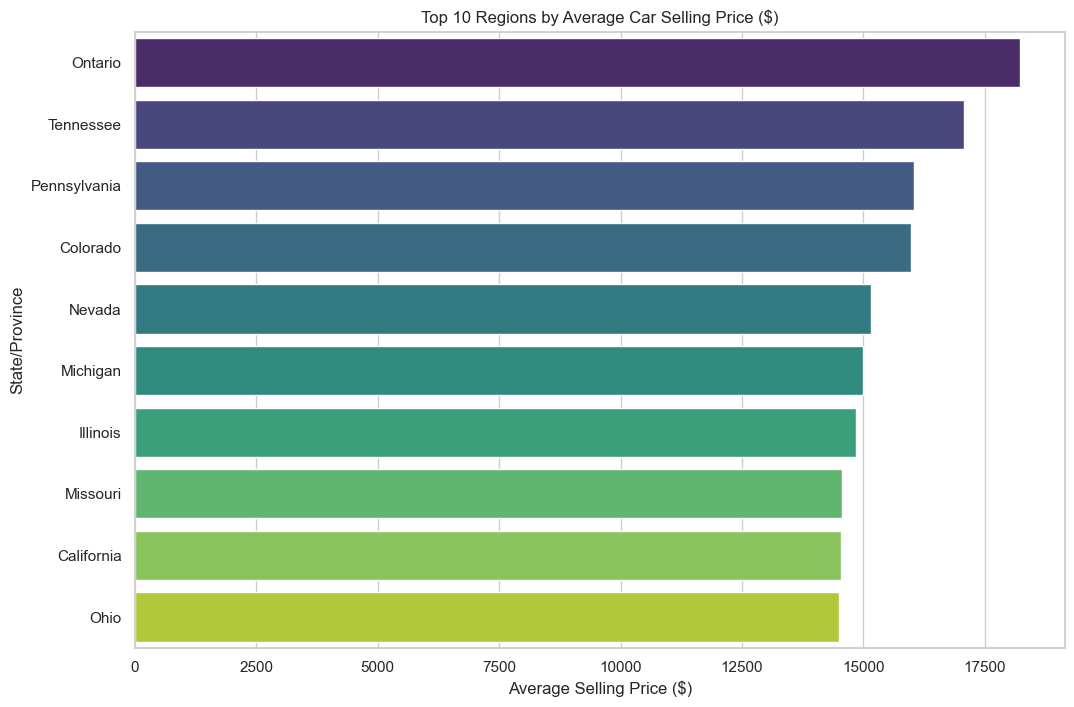

In [44]:
# Calculate average selling price for each state/province
avg_price_by_state = df.groupby("state")["sellingprice"].mean().reset_index()
# Rename columns for clarity
avg_price_by_state.columns = ["State", "Average Selling Price"]
# Horizontal bar plot of top 10 states/provinces
top_states = avg_price_by_state.sort_values(by="Average Selling Price", ascending=False).head(10)
plt.figure(figsize=(12, 8))# set figure size
sns.barplot(x="Average Selling Price", y="State", data=top_states, hue="State", palette="viridis", legend=False)
plt.title("Top 10 Regions by Average Car Selling Price ($)")# Title
plt.xlabel("Average Selling Price ($)")# x-axis label
plt.ylabel("State/Province")# y-axis label  
plt.show()# display plot 

### Machine Learning Model  

In [47]:
# Prepare the data for the model
# Define features (X) and target (y)
features = ['year', 'odometer', 'mmr', 'car_age']
target = 'sellingprice'
X = df[features]
y = df[target]


In [49]:
# Split the data with a 80/20 ratio (80% for training, 20% for testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")

Training set size: 438726 samples
Testing set size: 109682 samples


In [51]:
# Build and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [55]:
# Make predictions and evaluate the model

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): ${mse:,.2f}")
print(f"R-squared (R²): {r2:.4f}")
print("An R² value closer to 1.0 indicates a better fit.")

#Make a prediction based on manual input
print("\n" + "="*50)
print("    Predict Car Price from Manual Input    ")
print("="*50 + "\n")

try:
    print("Please enter the car details to predict its selling price:")
    input_year = int(input("Enter the car's year (e.g., 2018): "))
    input_odometer = int(input("Enter the car's mileage (odometer): "))
    input_mmr = int(input("Enter the car's MMR (Market Value): "))
    
    current_year = pd.Timestamp.now().year
    input_car_age = current_year - input_year

    # Create a DataFrame for the manual input, ensuring column order matches the training data
    manual_data = pd.DataFrame([[input_year, input_odometer, input_mmr, input_car_age]], 
                               columns=features)
    
    # Predict the price
    predicted_price = model.predict(manual_data)[0]

    print("\n" + "-"*50)
    print("Predicted Selling Price:")
    print(f"${predicted_price:,.2f}")
    print("-"*50)

except ValueError:
    print("Invalid input. Please enter valid numerical values.")
except Exception as e:
    print(f"An error occurred: {e}")



Mean Squared Error (MSE): $3,293,332.37
R-squared (R²): 0.9659
An R² value closer to 1.0 indicates a better fit.

    Predict Car Price from Manual Input    

Please enter the car details to predict its selling price:


Enter the car's year (e.g., 2018):  2013
Enter the car's mileage (odometer):  123
Enter the car's MMR (Market Value):  20500



--------------------------------------------------
Predicted Selling Price:
$22,070.20
--------------------------------------------------


#### Predicted vs. Actual Selling Price

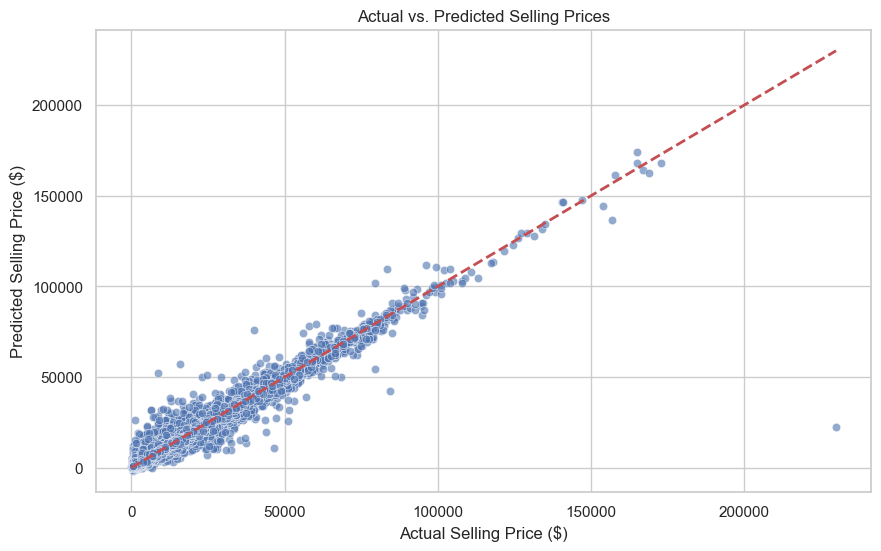

In [62]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', lw=2)
plt.title('Actual vs. Predicted Selling Prices')
plt.xlabel('Actual Selling Price ($)')
plt.ylabel('Predicted Selling Price ($)')
plt.show()

<p style="text-align: center;"><i>Document created by Yasmina Barkouch</i></p>